# **Housing : Price Prediction**

## **Problem Statement**
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:<br>
• Which variables are important to predict the price of variable?<br>
• How do these variables describe the price of the house?<br>

**Business Goal:**<br>
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.<br>

**Technical Requirements:**<br>
• Data contains 1460 entries each having 81 variables.<br>
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.<br>
• Extensive EDA has to be performed to gain relationships of important variable and price.<br>
• Data contains numerical as well as categorical variable. You need to handle them accordingly.<br>
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.<br> 
• You need to find important features which affect the price positively or negatively.<br>
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.<br>


In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
data = pd.read_csv('/content/sample_data/train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,...,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,...,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,...,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,...,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,...,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,...,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,...,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,

In [3]:
# check shape
data.shape

(1168, 81)

 - We have 1168 rows and 81 columns.

In [4]:
# check null
data_nan=pd.DataFrame(data[data.columns[data.isnull().any()]].isnull().sum())
data_nan

,0
LotFrontage,214
Alley,1091
MasVnrType,7
MasVnrArea,7
BsmtQual,30
BsmtCond,30
BsmtExposure,31
BsmtFinType1,30
BsmtFinType2,31
FireplaceQu,551


In [5]:
# check columns names
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# check datatypes
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

 - Our dataset has categorical and numeric data values.

In [7]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
# categorical columns
for column in data:
  if data[column].dtypes == object:
    print(str(column) + ':' +str(data[column].unique()))
    print(data[column].value_counts())
    print('\n')

MSZoning:['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street:['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley:[nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape:['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour:['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities:['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig:['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope:['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood:['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkS

 - We'll drop utilities column because it contains only 1 unique value.
 - In categorical columns there are missing values present in coumns Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

In [9]:
# handling missing values
data.isnull().values.any()

True

In [10]:
# check missing values of top 30 cloumns
data.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageType        64
GarageCond        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
BsmtExposure      31
BsmtFinType2      31
BsmtFinType1      30
BsmtCond          30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
Exterior2nd        0
Exterior1st        0
OverallCond        0
ExterQual          0
ExterCond          0
Foundation         0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
YearBuilt          0
SalePrice          0
OverallQual        0
dtype: int64

 - There are 1161 missing values in the column PoolQC, 1124 in MiscFeature, 11091 in Alley, 931 in Fence, 551 in FireplaceQu,214 in LotFrontage, 64 each in GarageType, GarageCond, GarageYrBlt, GarageFinish, GarageQual, 31 in BsmtExposure and BsmtFinType2, 30 in BsmtCond and BsmtQual, 7 in MasVnrArea and MasVnrType present in our dataset.

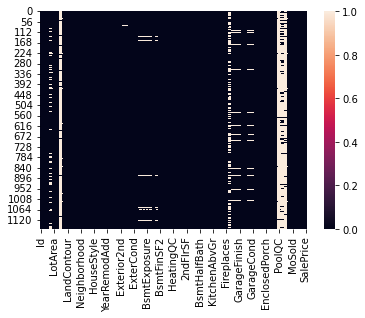

In [11]:
# visualize the missing values
sns.heatmap(data.isnull())

In [12]:
# check % of missing values in each column
def missing_values_table(data):
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(data)

Your selected dataframe has 81 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1161,99.4
MiscFeature,1124,96.2
Alley,1091,93.4
Fence,931,79.7
FireplaceQu,551,47.2
LotFrontage,214,18.3
GarageType,64,5.5
GarageYrBlt,64,5.5
GarageFinish,64,5.5
GarageQual,64,5.5


 - Majority of data is missing in the columns PoolQC, MiscFeature, Alley and Fence.

In [13]:
# fill missing values in categorical columns as NA
columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
data[columns] = data[columns].fillna('NA') 

In [14]:
# fill missing values in MasVnrArea with None
data['MasVnrArea'] = data['MasVnrArea'].fillna('None')

In [15]:
# fill missing values in GarageYrBlt with 0
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('0')

In [16]:
# imputing the missing values and replace it with the median
data['LotFrontage'].fillna(data['LotFrontage'].median,inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median,inplace=True)

In [17]:
# describe data
data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,10484.749144,6.104452,5.595890,1970.930651,1984.758562,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,8957.442311,1.390153,1.124343,30.145255,20.785185,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


 - Maximum standard deviation of 8957.44 is observed in LotArea column.

 - Maximum SalePrice of a house observed is 755000 and minimum is 34900.

 - In the columns Id, MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

 - In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.

 - In the columns Id, MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

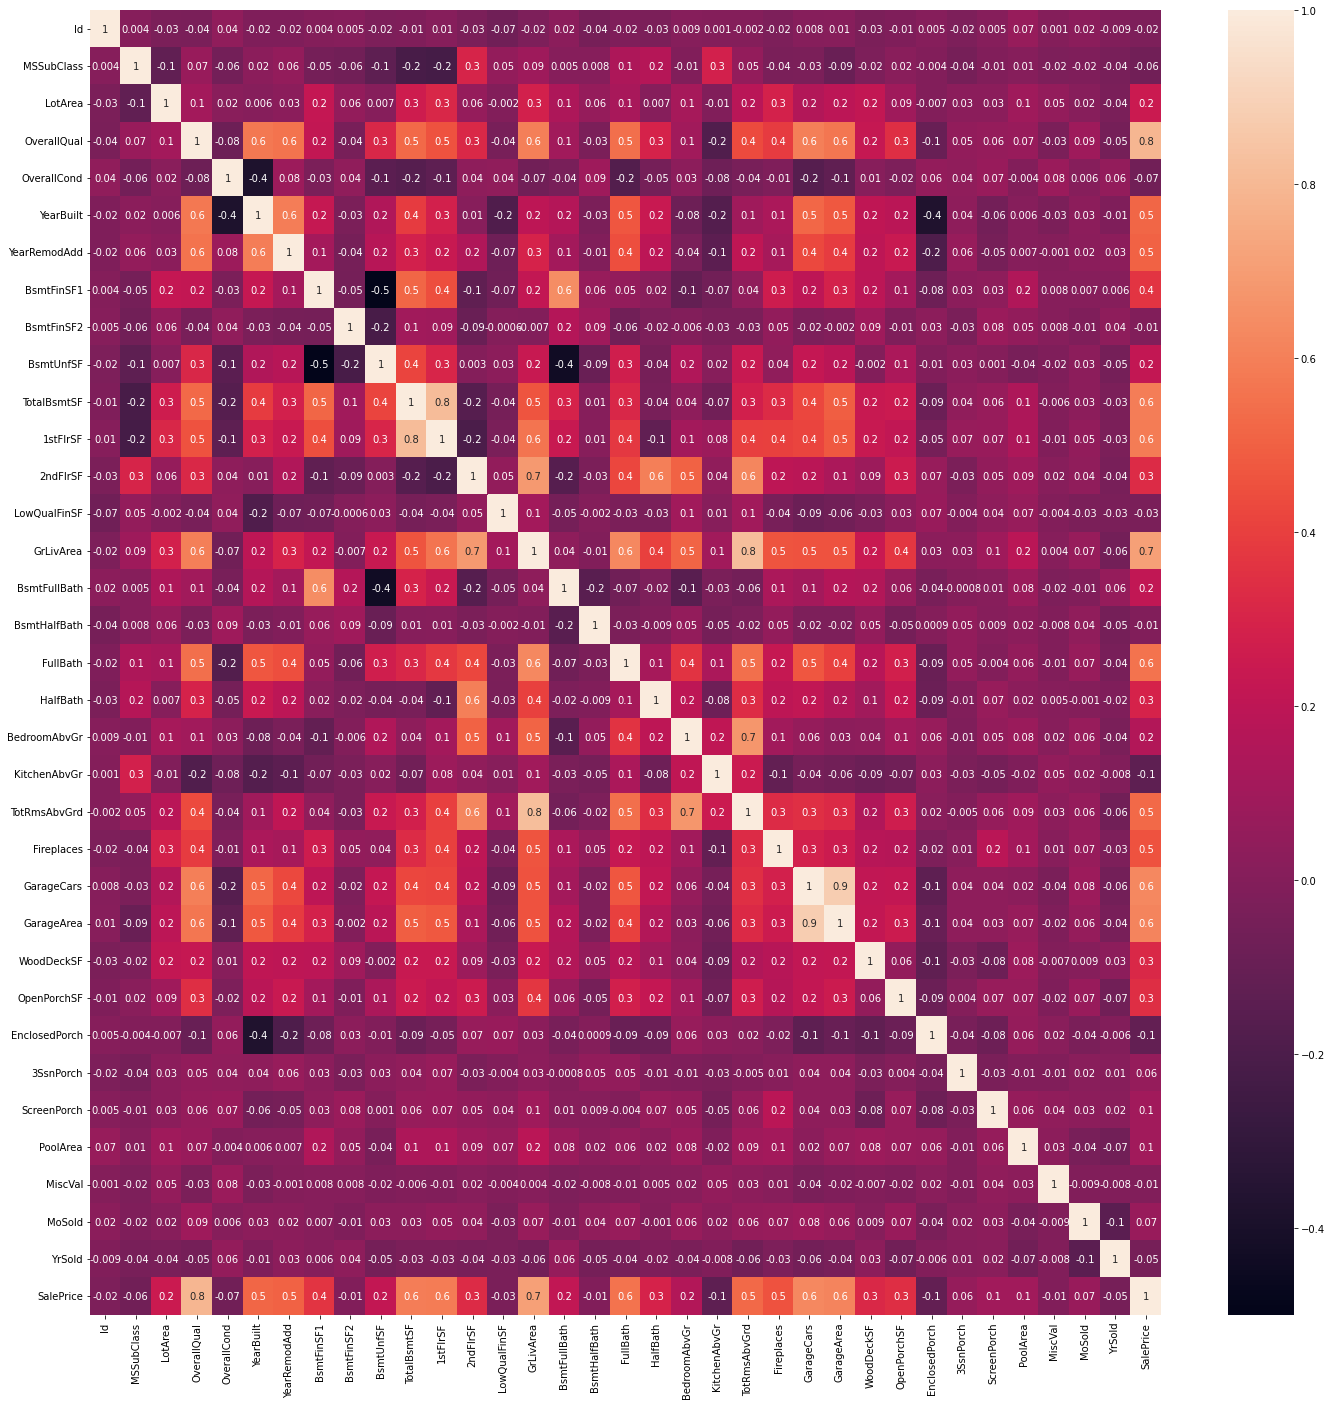

In [18]:
# check correlation
data_corr = data.corr()
plt.figure(figsize=(24,24))
sns.heatmap(data_corr, annot=True, fmt='.1g')
plt.show()

 - SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

 - SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

 - We observe multicollinearity in between columns so we will be using Principal Component Analysis(PCA).

 - No correlation has been observed between the column Id and other columns so we will be dropping this column.

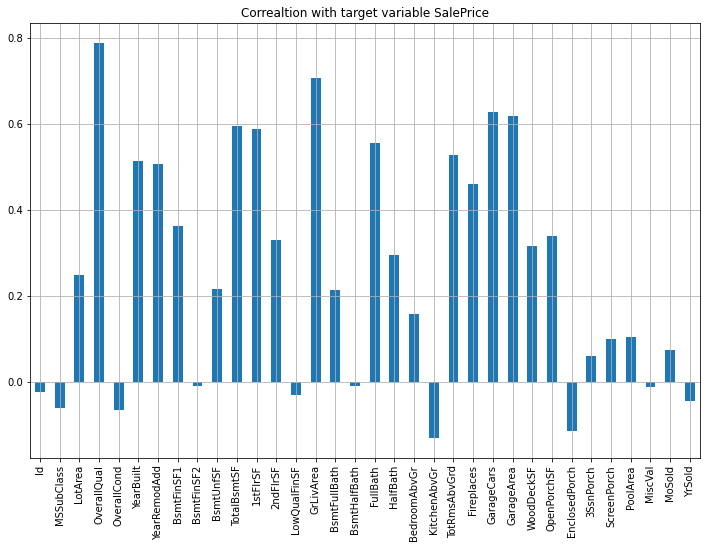

In [19]:
# checking correlation with target variable
plt.figure(figsize=(12,8))
data.drop('SalePrice',axis=1).corrwith(data['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correaltion with target variable SalePrice");

 - The column OverallQual is positively correlated with SalePrice.
 - The column KitchenAbvGrd is most negatively correlated with SalePrice.

# **Data Visualization**
## **Univariate Analysis**

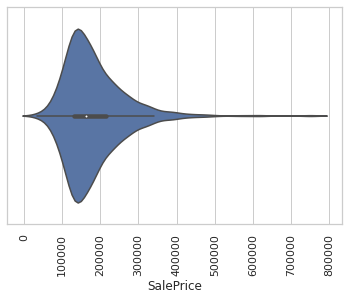

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

In [20]:
# check the target variable
sns.set(style='whitegrid')
sns.violinplot(data['SalePrice'])
plt.xticks(rotation=90)
plt.show()

data['SalePrice'].value_counts()

 - The maximum number of SalePrice lies between 140000 and 230000.

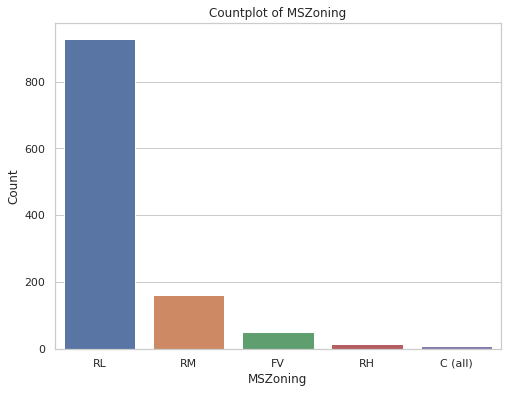

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [21]:
# check column MsZoning
plt.subplots(figsize=(8,6))
sns.countplot(x='MSZoning',data=data)
plt.title('Countplot of MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Count')
plt.show()

data['MSZoning'].value_counts()

 - Maximum, 928 number of MSZoning are RL.

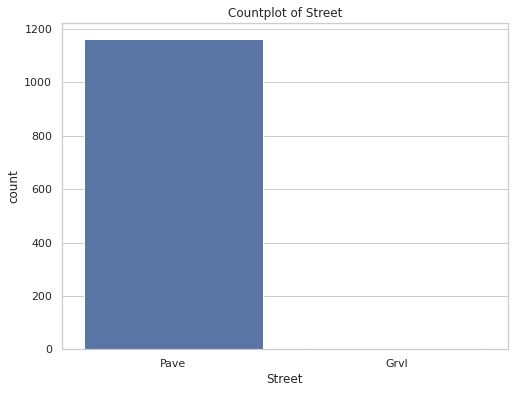

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [22]:
# check the column street
plt.subplots(figsize=(8,6))
sns.countplot(x='Street',data=data)
plt.title('Countplot of Street')
plt.xlabel('Street')
plt.ylabel('count')
plt.show()

data['Street'].value_counts()

 - Maximum, 1164 number of Street are Pave where as only 4 are Grvl.

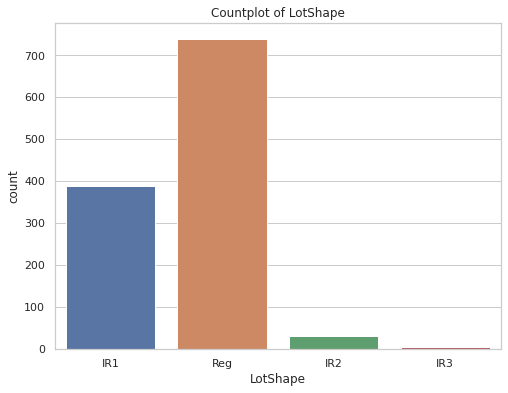

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [23]:
# check column LotShape
plt.subplots(figsize=(8,6))
sns.countplot(x='LotShape',data=data)
plt.title('Countplot of LotShape')
plt.xlabel('LotShape')
plt.ylabel('count')
plt.show()

data['LotShape'].value_counts()

 - Maximum, 740 number of LotShape are Reg.

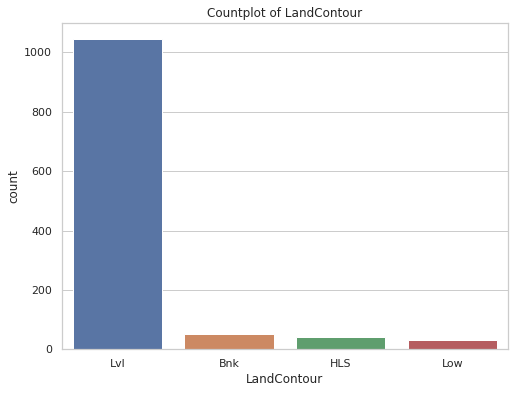

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [24]:
# check LandContour
plt.subplots(figsize=(8,6))
sns.countplot(x='LandContour',data=data)
plt.title('Countplot of LandContour')
plt.xlabel('LandContour')
plt.ylabel('count')
plt.show()

data['LandContour'].value_counts()

 - Maximum, 1046 number of LandContour are Lvl.

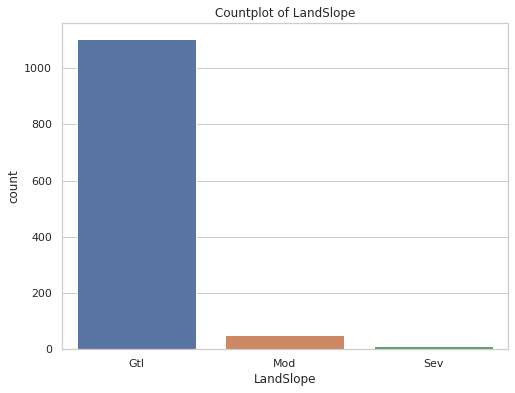

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [25]:
# check LandSlope
plt.subplots(figsize=(8,6))
sns.countplot(x='LandSlope',data=data)
plt.title('Countplot of LandSlope')
plt.xlabel('LandSlope')
plt.ylabel('count')
plt.show()

data['LandSlope'].value_counts()

 - Maximum, 1105 number of LandSlope are Gtl.


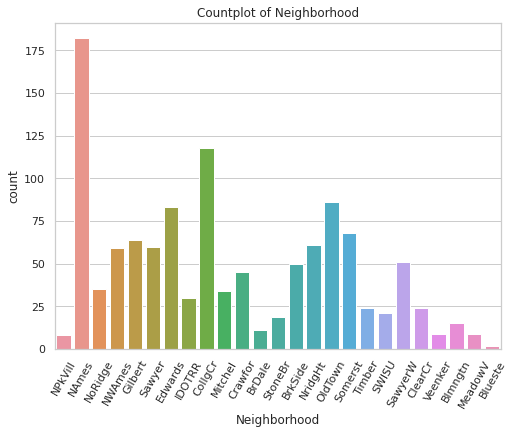

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [26]:
# check Neighborhood
plt.subplots(figsize=(8,6))
sns.countplot(x='Neighborhood',data=data)
plt.title('Countplot of Neighborhood')
plt.xticks(rotation=60)
plt.xlabel('Neighborhood')
plt.ylabel('count')
plt.show()

data['Neighborhood'].value_counts()

 - Maximum, 182 number of Neighborhood are Names.

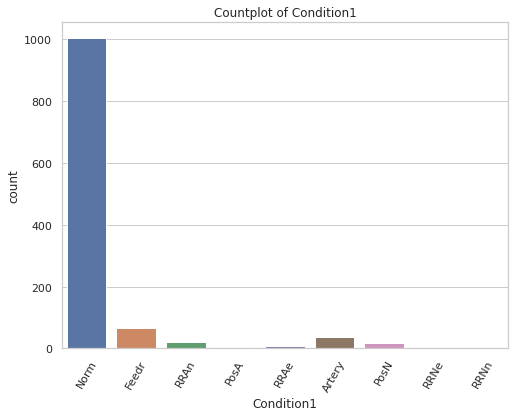

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [27]:
# check Condition1
plt.subplots(figsize=(8,6))
sns.countplot(x='Condition1',data=data)
plt.title('Countplot of Condition1')
plt.xticks(rotation=60)
plt.xlabel('Condition1')
plt.ylabel('count')
plt.show()

data['Condition1'].value_counts()

 - Maximum, 1005 number of Condition1 is Norm.

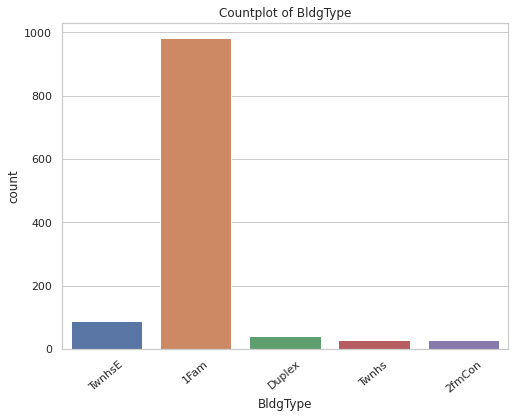

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [28]:
# check BldgType

plt.subplots(figsize=(8,6))
sns.countplot(x="BldgType", data=data)
plt.title("Countplot of BldgType")
plt.xticks(rotation=40)
plt.xlabel('BldgType')
plt.ylabel("count")
plt.show()

data['BldgType'].value_counts()

 - Maximum, 981 number of BldgType are 1Fam.

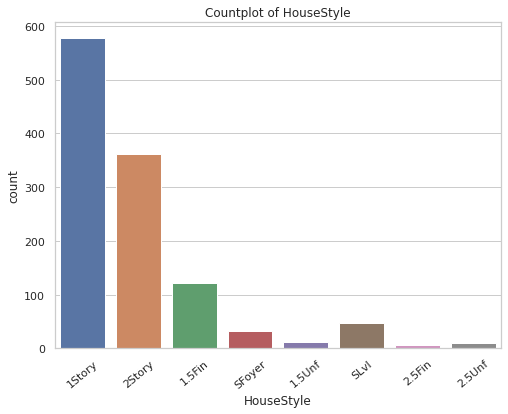

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [29]:
# check HouseStyle
plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=data)
plt.title("Countplot of HouseStyle")
plt.xticks(rotation=40)
plt.xlabel('HouseStyle')
plt.ylabel("count")
plt.show()

data['HouseStyle'].value_counts()

 - Story has highest number of count followed by 2Story, 1.5Fin, SlvL etc.


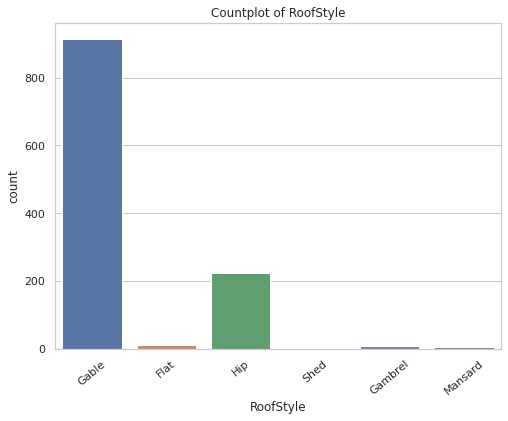

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [30]:
# check RoofStyle
plt.subplots(figsize=(8,6))
sns.countplot(x="RoofStyle", data=data)
plt.title("Countplot of RoofStyle")
plt.xticks(rotation=40)
plt.xlabel('RoofStyle')
plt.ylabel("count")
plt.show()

data['RoofStyle'].value_counts()

 - Maximum, 915 number of RoofStyle are Gable.

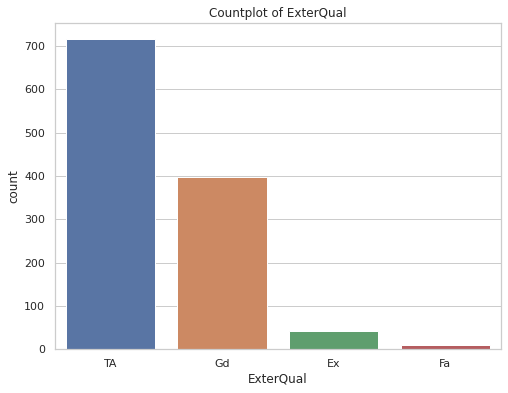

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

In [31]:
# check ExterQual
plt.subplots(figsize=(8,6))
sns.countplot(x="ExterQual", data=data)
plt.title("Countplot of ExterQual")
plt.xlabel('ExterQual')
plt.ylabel("count")
plt.show()

data['ExterQual'].value_counts()

 - Maximum, 717 number of ExterQual is TA.


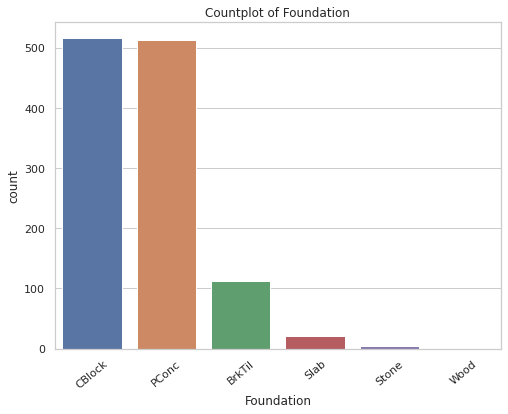

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [32]:
# check Foundation
plt.subplots(figsize=(8,6))
sns.countplot(x="Foundation", data=data)
plt.title("Countplot of Foundation")
plt.xticks(rotation=40)
plt.xlabel('Foundation')
plt.ylabel("count")
plt.show()

data['Foundation'].value_counts()

 - Maximum, 516 number of Foundation are CBlock.

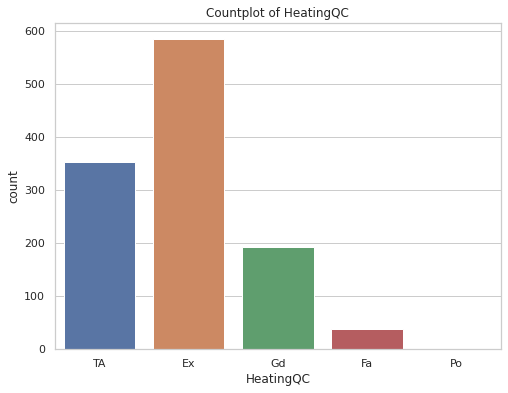

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [33]:
# check HeatingQC
plt.subplots(figsize=(8,6))
sns.countplot(x="HeatingQC", data=data)
plt.title("Countplot of HeatingQC")
plt.xlabel('HeatingQC')
plt.ylabel("count")
plt.show()

data['HeatingQC'].value_counts()

 - Maximum, 585 number of HeatingQC is Ex.

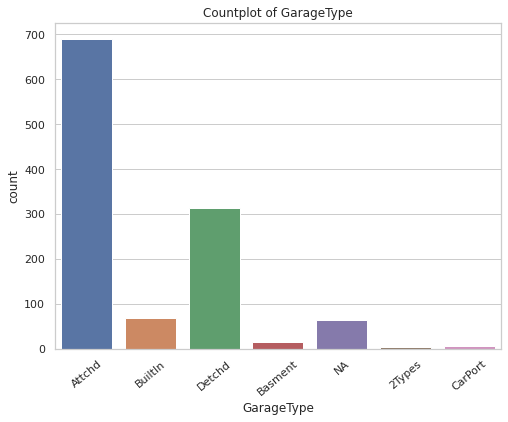

Attchd     691
Detchd     314
BuiltIn     70
NA          64
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [34]:
# check GarageType
plt.subplots(figsize=(8,6))
sns.countplot(x="GarageType", data=data)
plt.title("Countplot of GarageType")
plt.xticks(rotation=40)
plt.xlabel('GarageType')
plt.ylabel("count")
plt.show()

data['GarageType'].value_counts()

 - Maximum, 691 number of GarageType are Attchd.



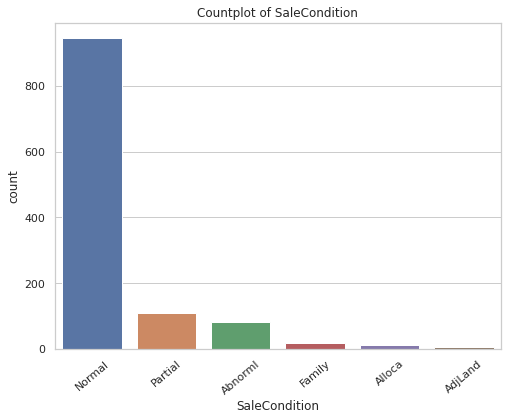

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [35]:
# check SaleCondition
plt.subplots(figsize=(8,6))
sns.countplot(x="SaleCondition", data=data)
plt.title("Countplot of SaleCondition")
plt.xticks(rotation=40)
plt.xlabel('SaleCondition')
plt.ylabel("count")
plt.show()

data['SaleCondition'].value_counts()

 - Maximum, 945 number of SaleCondition is normal.



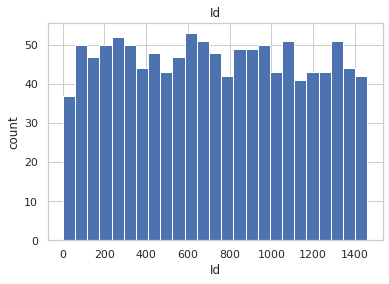

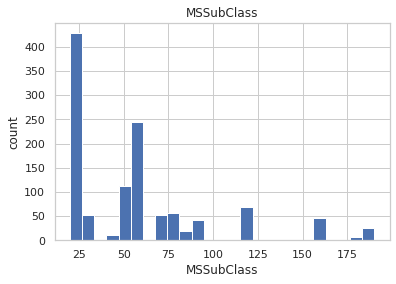

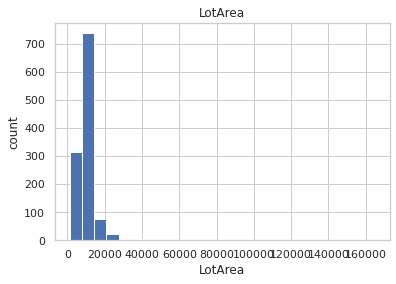

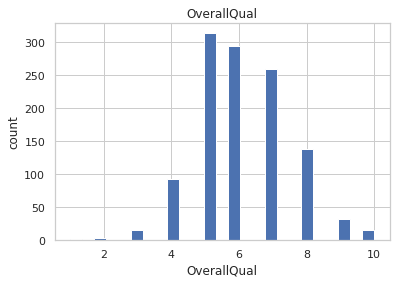

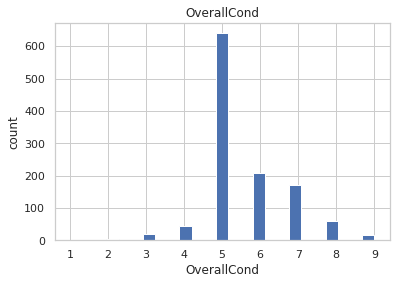

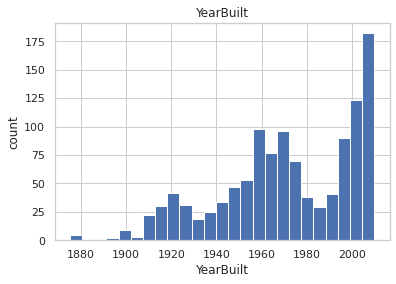

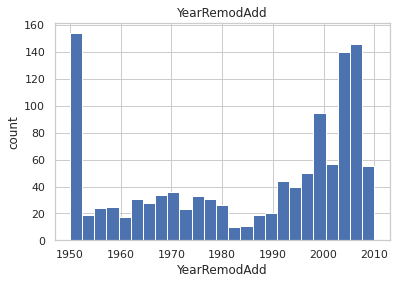

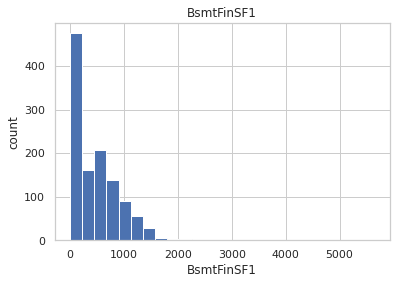

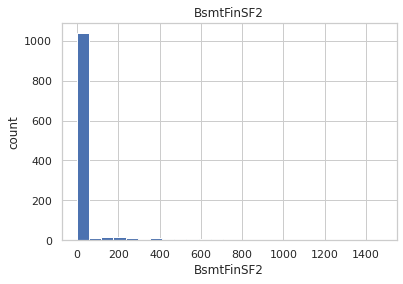

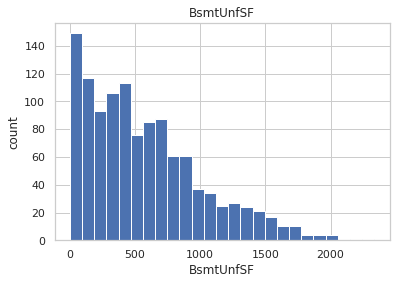

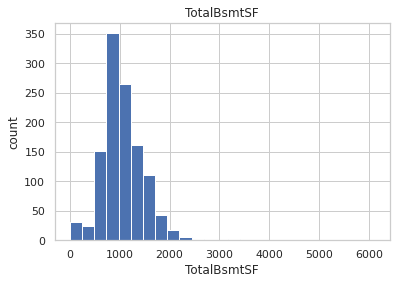

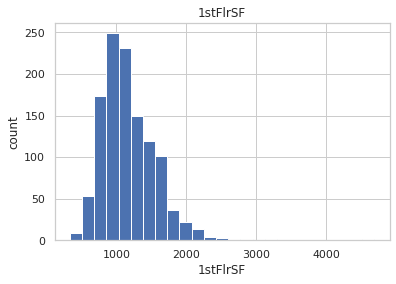

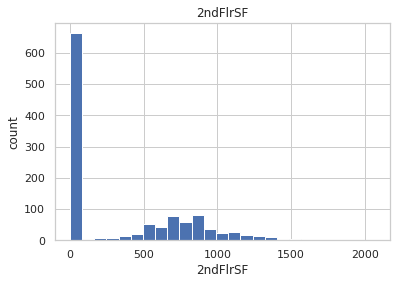

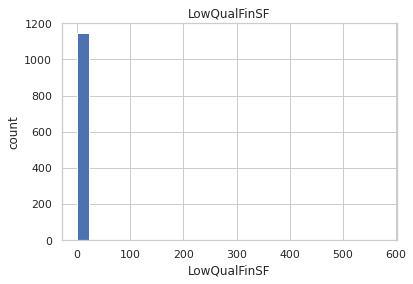

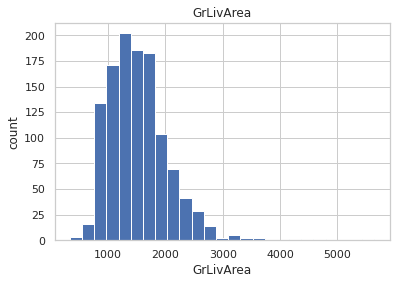

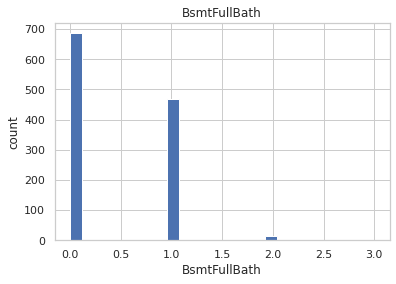

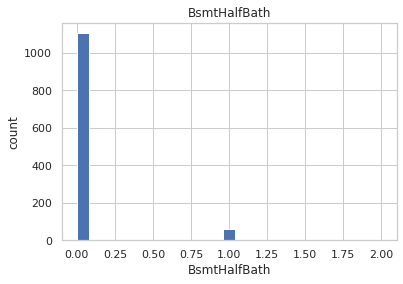

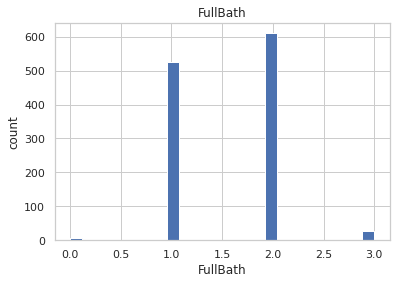

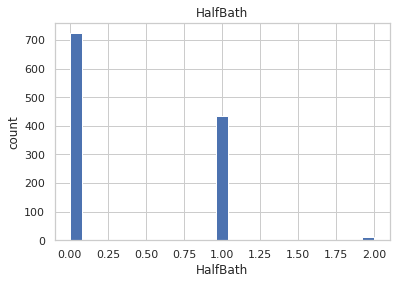

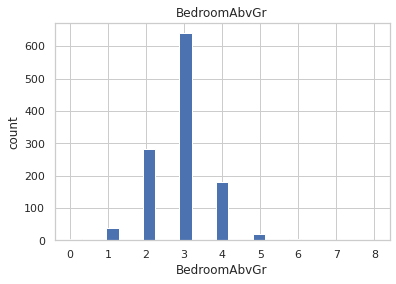

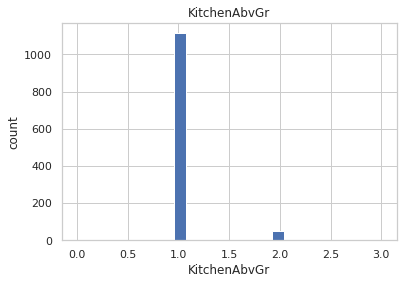

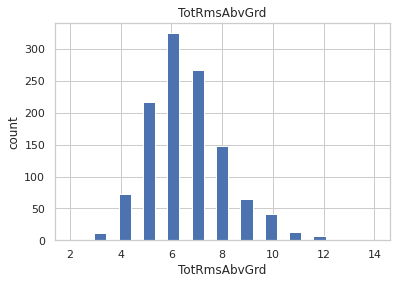

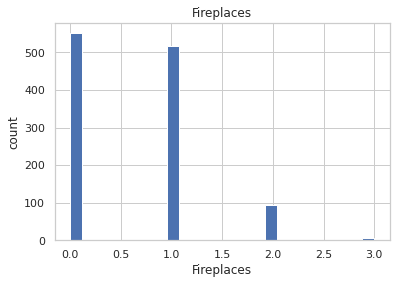

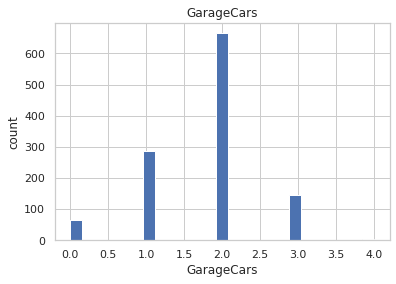

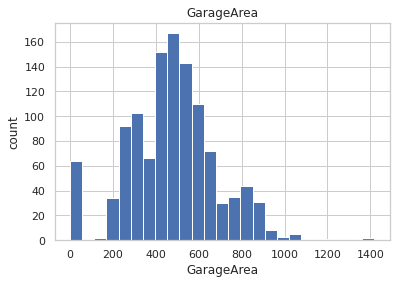

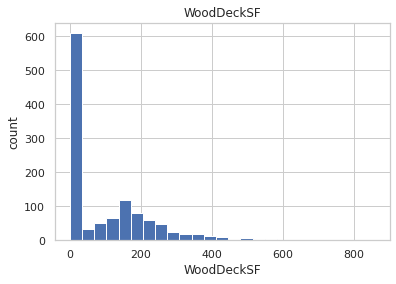

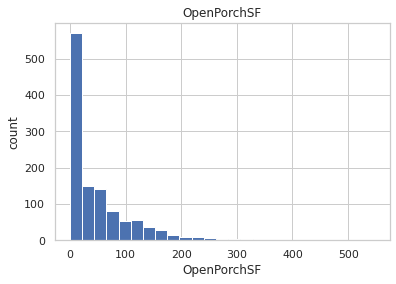

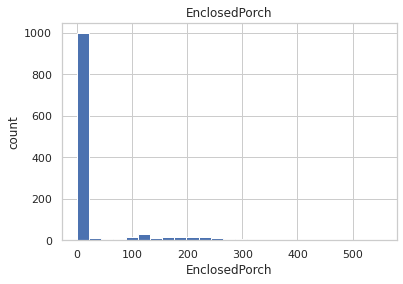

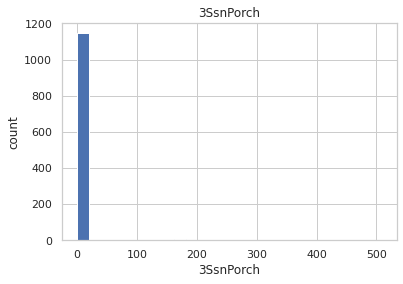

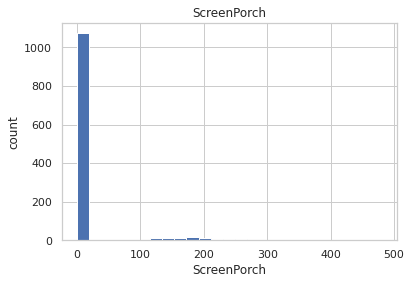

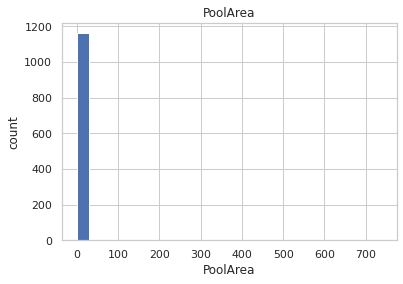

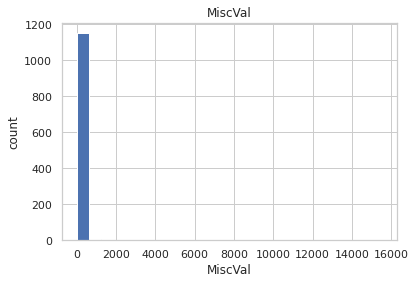

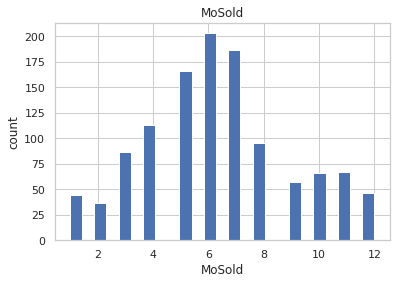

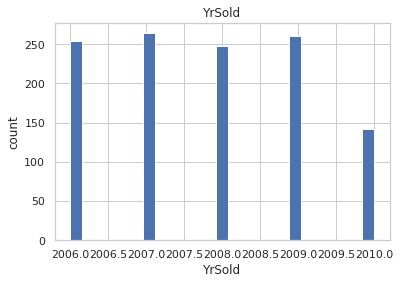

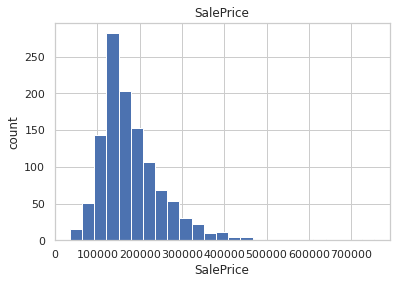

In [36]:
# plot histogram for every numeric column
for col in data.describe().columns:
  data = data.copy()
  data[col].hist(bins=25)
  plt.xlabel(col)
  plt.ylabel('count')
  plt.title(col)
  plt.show()

## **Bi-Variate Analysis**

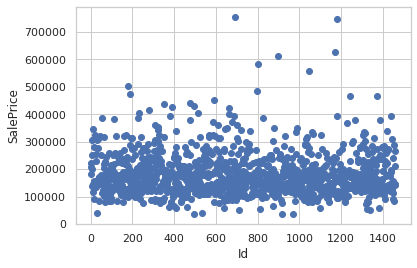

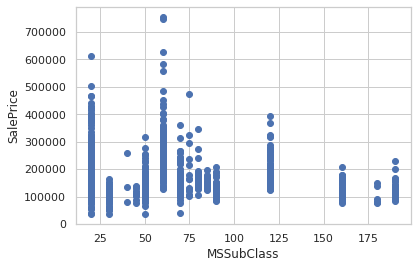

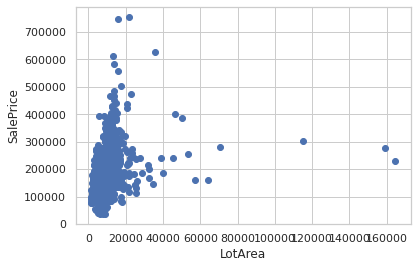

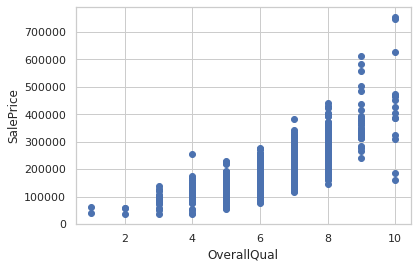

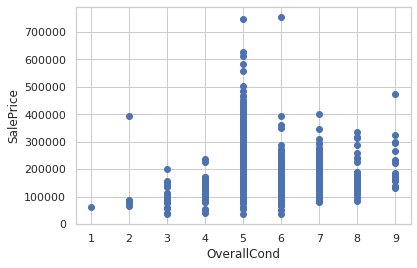

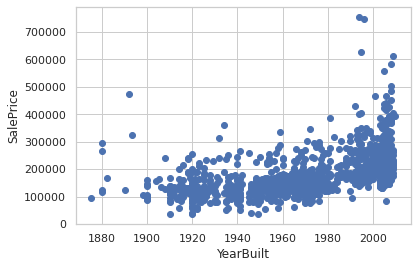

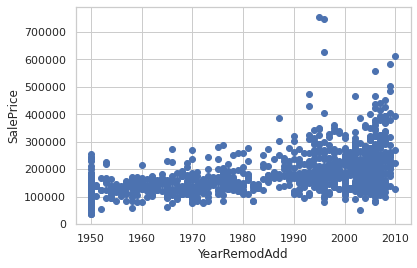

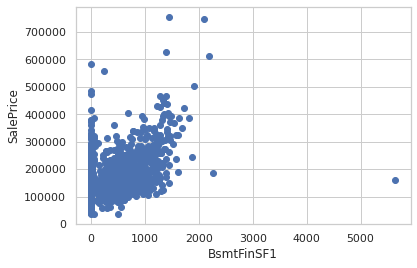

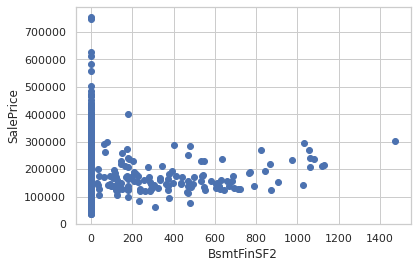

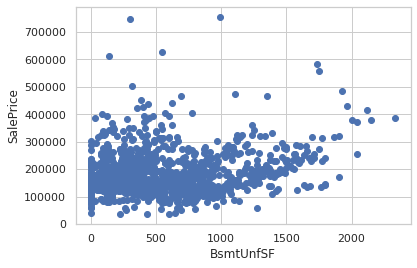

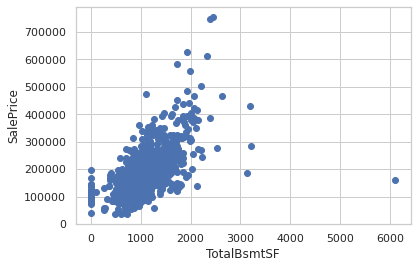

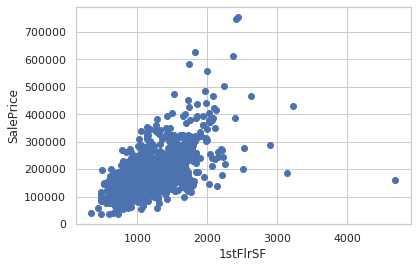

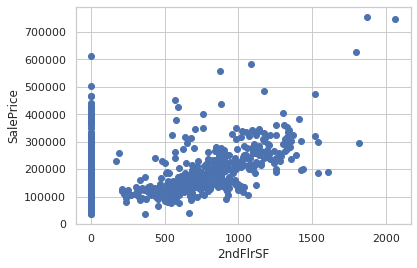

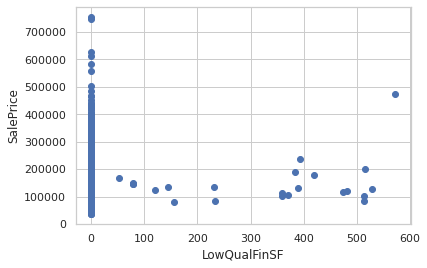

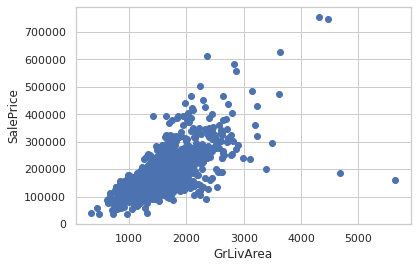

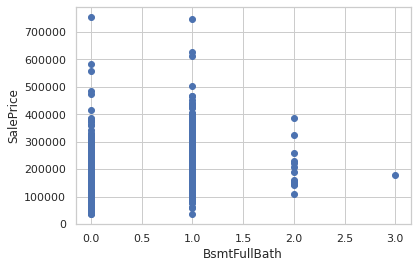

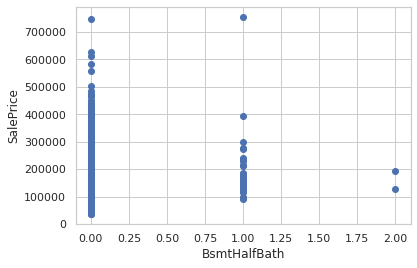

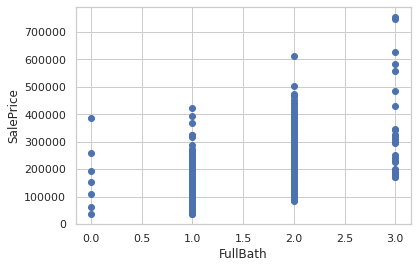

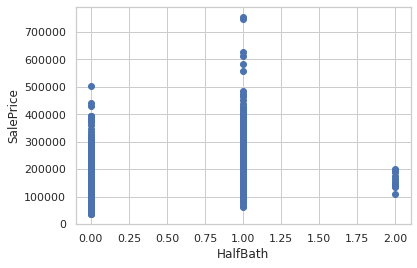

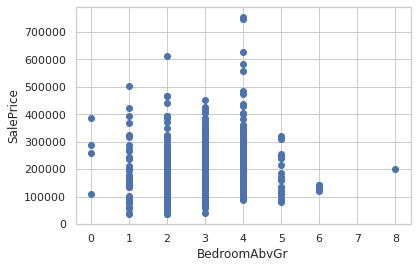

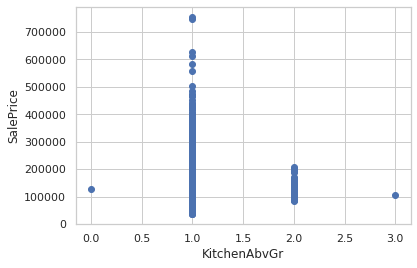

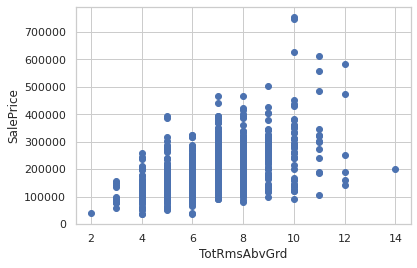

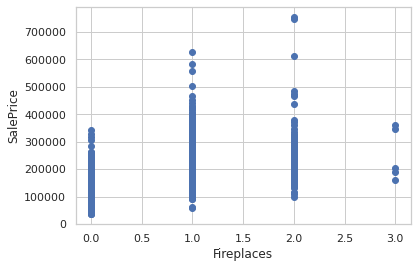

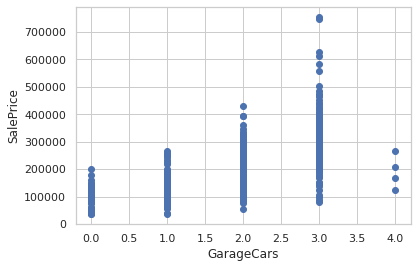

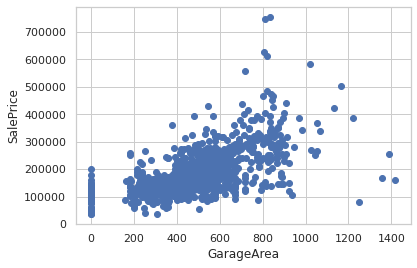

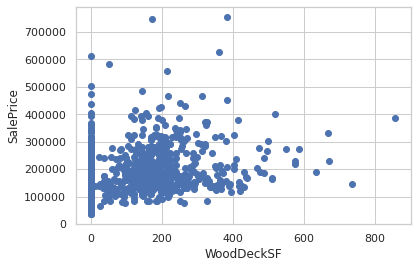

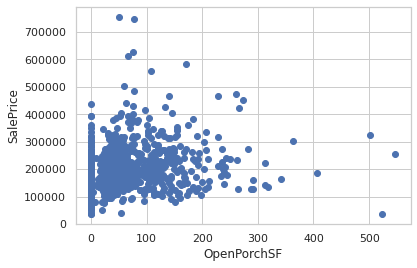

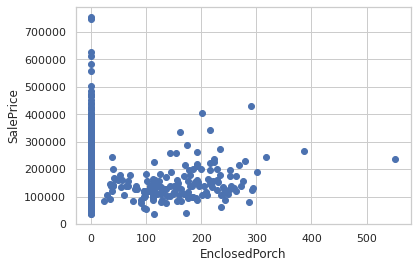

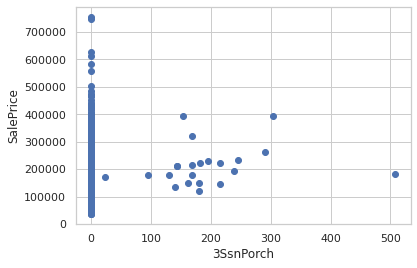

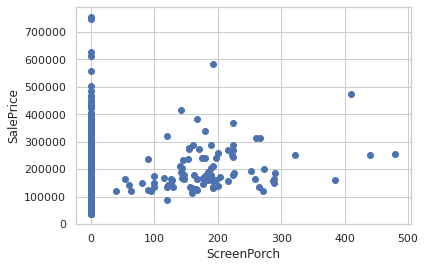

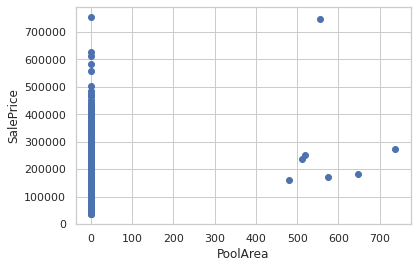

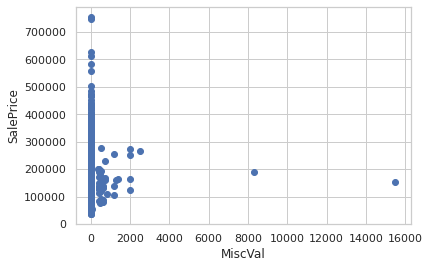

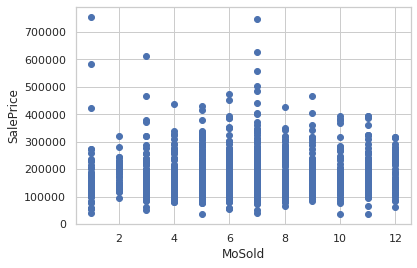

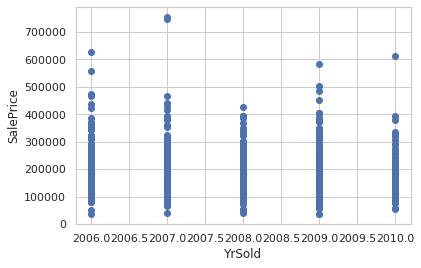

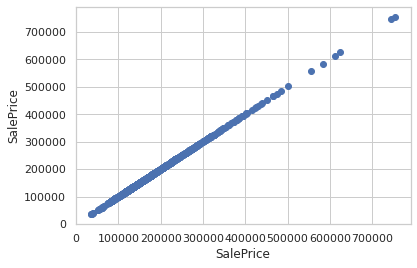

In [37]:
# plot scatter plot between feature and target variable.
for col in data.describe().columns:
  data = data.copy()
  plt.scatter(data[col],data['SalePrice'])
  plt.xlabel(col)
  plt.ylabel('SalePrice')
  plt.show()


<Figure size 576x432 with 0 Axes>

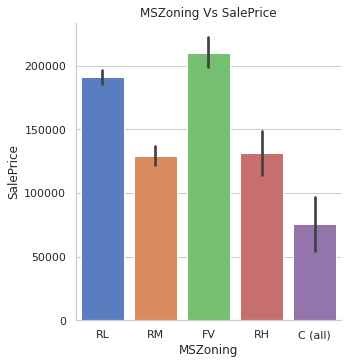

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Name: MSZoning, Length: 697, dtype: int64


In [38]:
# plot the factor plot between MSZoning vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='MSZoning',y='SalePrice',data=data,kind='bar',size=5,palette='muted',aspect=1)
plt.title('MSZoning Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['MSZoning'].value_counts())

 - SalePrice is maximum with FV MSZOning.

<Figure size 576x432 with 0 Axes>

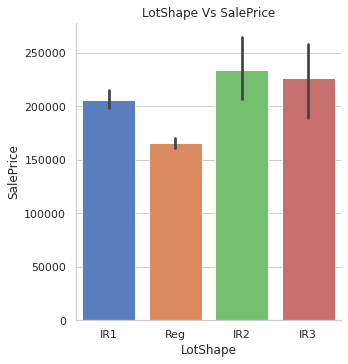

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [39]:
# plot the factor plot between LotShape vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=data,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotShape Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['LotShape'].value_counts())

 - SalePrice is maximum with IR2 LotShape.


<Figure size 576x432 with 0 Axes>

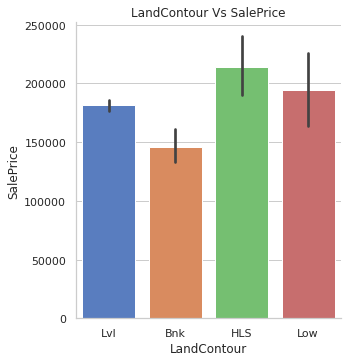

SalePrice  LandContour
34900      Lvl            1
35311      Lvl            1
37900      Lvl            1
39300      Low            1
40000      Lvl            1
                         ..
582933     Lvl            1
611657     Lvl            1
625000     Lvl            1
745000     Lvl            1
755000     Lvl            1
Name: LandContour, Length: 655, dtype: int64


In [40]:
# plot between LandContour Vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LandContour',y='SalePrice',data=data,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LandContour Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['LandContour'].value_counts())

 - SalePrice is maximum with HLS LandContour.

<Figure size 576x432 with 0 Axes>

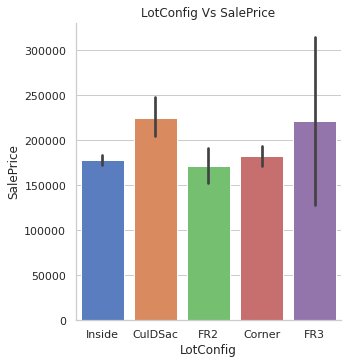

SalePrice  LotConfig
34900      Inside       1
35311      Inside       1
37900      Inside       1
39300      Inside       1
40000      Inside       1
                       ..
582933     Inside       1
611657     Inside       1
625000     CulDSac      1
745000     Corner       1
755000     Corner       1
Name: LotConfig, Length: 743, dtype: int64


In [41]:
# plot between LotConfig Vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LotConfig',y='SalePrice',data=data,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotConfig Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['LotConfig'].value_counts())

 - SalePrice is maximum with CulDsac LotConfig.

<Figure size 576x432 with 0 Axes>

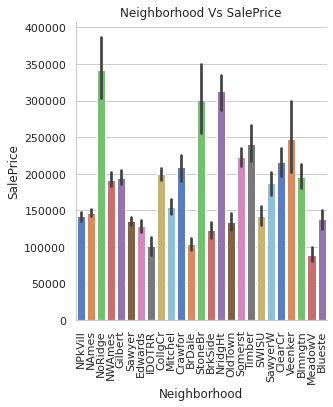

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [42]:
# plot between Neighborhood Vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='Neighborhood',y='SalePrice',data=data,kind='bar',size=5,palette='muted',aspect=1)
plt.xticks(rotation=90)
plt.title('Neighborhood Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['Neighborhood'].value_counts())

 - SalePrice is maximum with NoRidge Neighborhood.

<Figure size 576x432 with 0 Axes>

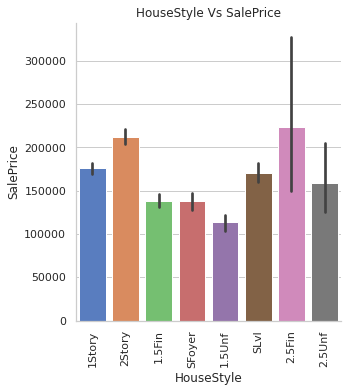

SalePrice  HouseStyle
34900      1Story        1
35311      1Story        1
37900      1.5Fin        1
39300      1Story        1
40000      2Story        1
                        ..
582933     2Story        1
611657     1Story        1
625000     2Story        1
745000     2Story        1
755000     2Story        1
Name: HouseStyle, Length: 840, dtype: int64


In [43]:
# plot between HouseStyle Vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='HouseStyle',y='SalePrice',data=data,kind='bar',size=5,palette='muted',aspect=1)
plt.xticks(rotation=90)
plt.title('HouseStyle Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['HouseStyle'].value_counts())

 - SalePrice is maximum with 2.5Fin HouseStyle.

<Figure size 576x432 with 0 Axes>

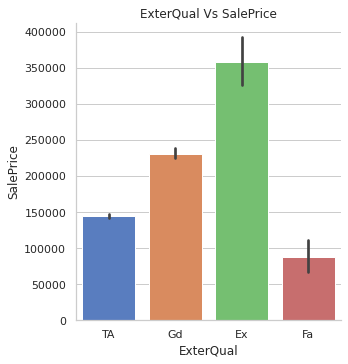

SalePrice  ExterQual
34900      TA           1
35311      TA           1
37900      TA           1
39300      Fa           1
40000      TA           1
                       ..
582933     Ex           1
611657     Ex           1
625000     Gd           1
745000     Gd           1
755000     Ex           1
Name: ExterQual, Length: 679, dtype: int64


In [44]:
# plot between ExterQual Vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='ExterQual',y='SalePrice',data=data,kind='bar',size=5,palette='muted',aspect=1)
#plt.xticks(rotation=90)
plt.title('ExterQual Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['ExterQual'].value_counts())

 - SalePrice is maximum with Ex ExterQual.

<Figure size 576x432 with 0 Axes>

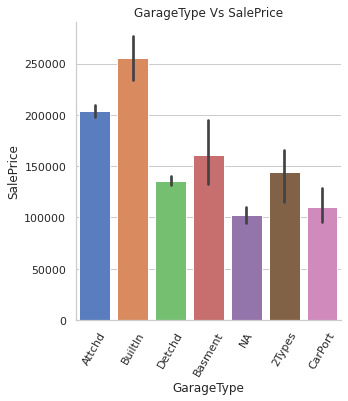

SalePrice  GarageType
34900      NA            1
35311      Detchd        1
37900      NA            1
39300      NA            1
40000      Detchd        1
                        ..
582933     BuiltIn       1
611657     Attchd        1
625000     Attchd        1
745000     Attchd        1
755000     Attchd        1
Name: GarageType, Length: 762, dtype: int64


In [45]:
# plot between GarageType Vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='GarageType',y='SalePrice',data=data,kind='bar',size=5,palette='muted',aspect=1)
plt.xticks(rotation=60)
plt.title('GarageType Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['GarageType'].value_counts())

 - SalePrice is maximum with Builtin GarageType.

<Figure size 576x432 with 0 Axes>

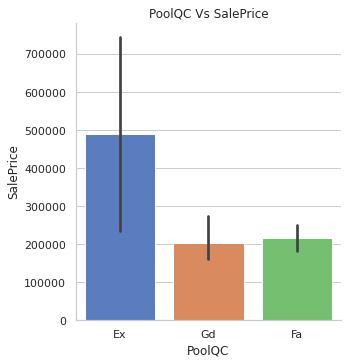

SalePrice  PoolQC
160000     Gd        1
171000     Gd        1
181000     Fa        1
235000     Ex        1
250000     Fa        1
274970     Gd        1
745000     Ex        1
Name: PoolQC, dtype: int64


In [46]:
# plot between PoolQC Vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='PoolQC',y='SalePrice',data=data,kind='bar',size=5,palette='muted',aspect=1)
#plt.xticks(rotation=60)
plt.title('PoolQC Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['PoolQC'].value_counts())

 - SalePrice is maximum with Ex PoolQC.

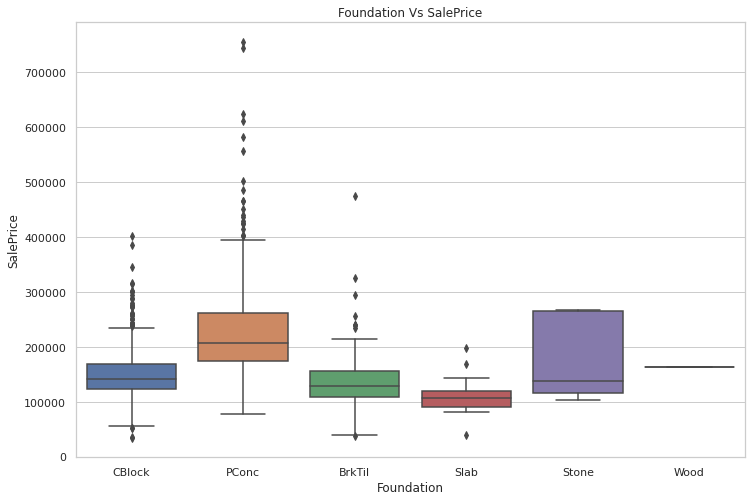

SalePrice  Foundation
34900      CBlock        1
35311      CBlock        1
37900      BrkTil        1
39300      Slab          1
40000      BrkTil        1
                        ..
582933     PConc         1
611657     PConc         1
625000     PConc         1
745000     PConc         1
755000     PConc         1
Name: Foundation, Length: 752, dtype: int64


In [47]:
# plot between Foundation Vs SalePrice
plt.figure(figsize=(12,8))
sns.boxplot(x='Foundation',y='SalePrice',data=data)
#plt.xticks(rotation=60)
plt.title('Foundation Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['Foundation'].value_counts())

 - SalePrice is maximum with PConc.

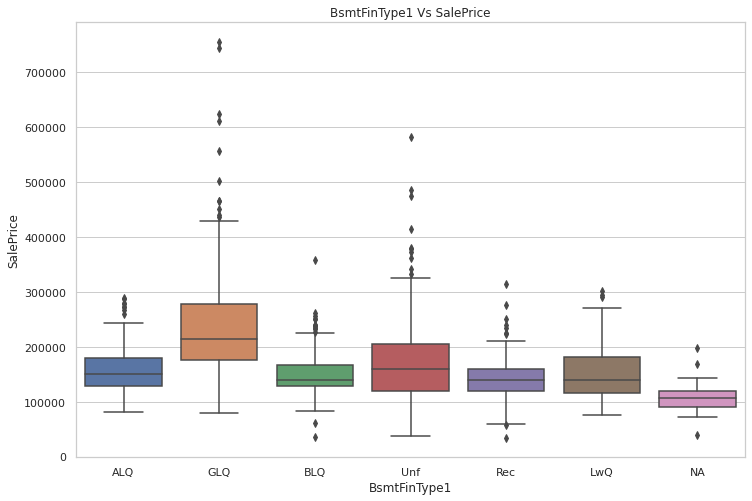

SalePrice  BsmtFinType1
34900      Rec             1
35311      BLQ             1
37900      Unf             1
39300      NA              1
40000      Unf             1
                          ..
582933     Unf             1
611657     GLQ             1
625000     GLQ             1
745000     GLQ             1
755000     GLQ             1
Name: BsmtFinType1, Length: 917, dtype: int64


In [48]:
# plot between BsmtFinType1 Vs SalePrice
plt.figure(figsize=(12,8))
sns.boxplot(x='BsmtFinType1',y='SalePrice',data=data)
#plt.xticks(rotation=60)
plt.title('BsmtFinType1 Vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(data.groupby('SalePrice')['BsmtFinType1'].value_counts())

 - SalePrice is maximum with GLQ BsmtFinType1.

## **Multi-Variate Analysis**

<Figure size 1008x1008 with 0 Axes>

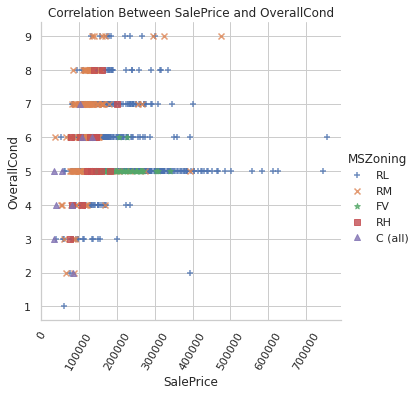

In [49]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning
plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='OverallCond',fit_reg=False,data=data,hue='MSZoning',markers=['+','x','*','s','^'])
plt.xlabel('SalePrice')
plt.title('Correlation Between SalePrice and OverallCond')
plt.ylabel('OverallCond')
plt.xticks(rotation=60)
plt.show()

 - With MSZoning RL and increase in OverallQual the SalePrice of a house increases.

<Figure size 1008x1008 with 0 Axes>

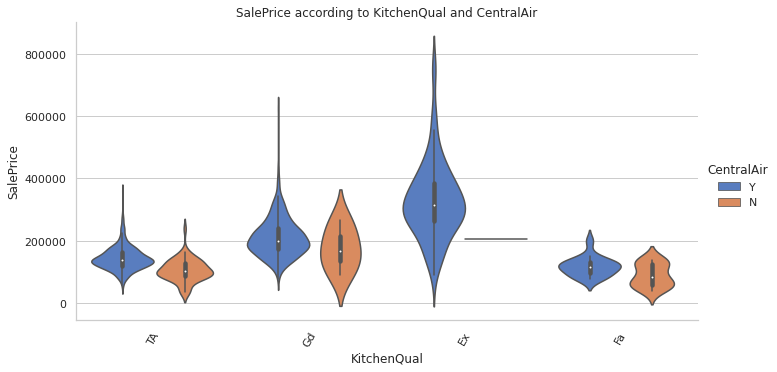

In [50]:
# Let's plot the GarageType and GarageCond with respect to SalePrice plot
plt.figure(figsize=(14,14))
sns.factorplot(x='KitchenQual',y='SalePrice',data=data,hue='CentralAir',kind='violin',size=5,palette='muted',aspect=2)
plt.title('SalePrice according to KitchenQual and CentralAir')
plt.xticks(rotation=60)
plt.ylabel('SalePrice')
plt.show()

 - SalePrice is maximum with Ex kitchenQual and CentralAir.

<Figure size 1008x1008 with 0 Axes>

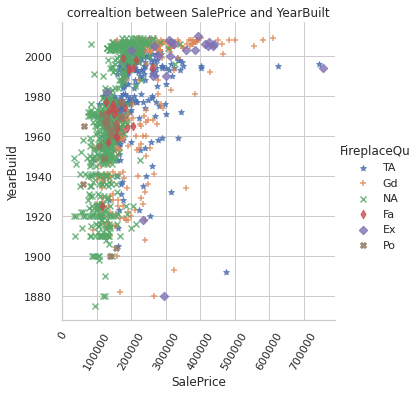

In [51]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning
plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='YearBuilt',fit_reg=False,data=data,hue='FireplaceQu',markers=['*','+','x','d','D','X'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and YearBuilt')
plt.ylabel('YearBuild')
plt.xticks(rotation=60)
plt.show()

 - As the YearBuilt is increasing SalePrice is also increasing.

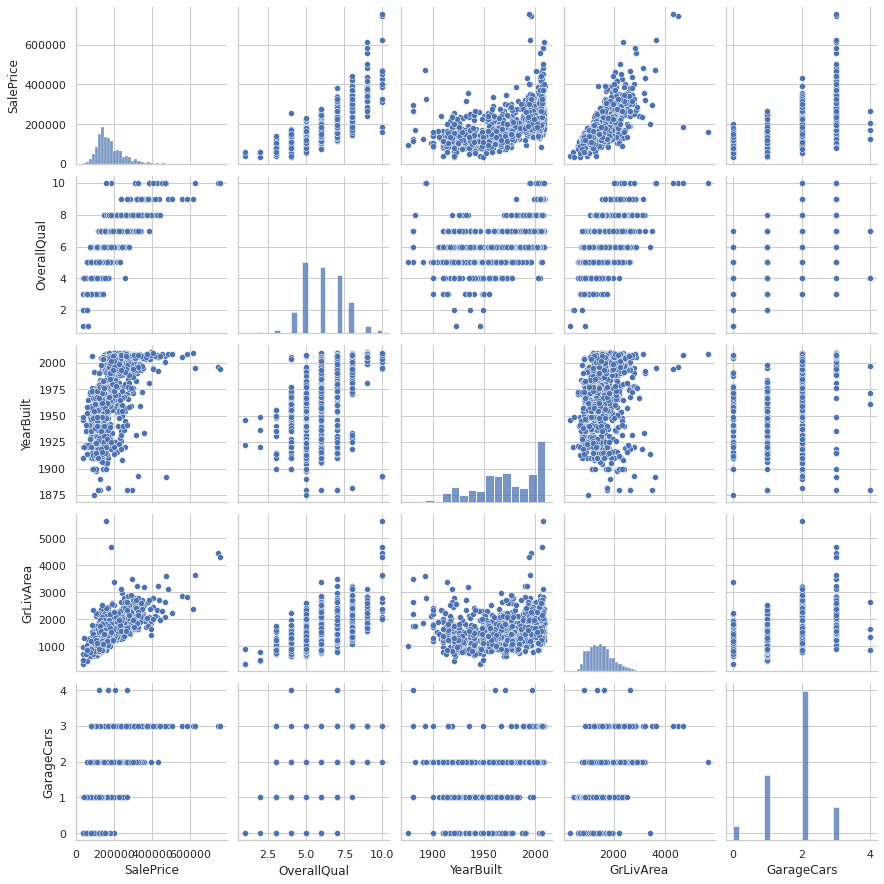

In [52]:
# plot pairplot
sns.pairplot(data=data,vars=['SalePrice','OverallQual','YearBuilt','GrLivArea','GarageCars'])

 - SalePrice is highly positively correlated with GrLivArea and OverallQual.

# **Pre-Processing**

In [53]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
data.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence",],axis=1,inplace=True)
data

In [63]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 



data = pd.get_dummies(data, columns = categorical_cols, drop_first=True)

KeyError: ignored

## **Handling outliers and skewness through winsorization technique**

In [57]:
data_cap = data.copy()

In [58]:
def percentile_capping(data, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=data[col], limits=(from_low_end, from_high_end), inplace=True)

In [59]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [60]:
percentile_capping(data,features,0.01,0.10)

TypeError: ignored

In [ ]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(data_cap[col], label="skew: " + str(np.round(data_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(data[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(data_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show();
